<a href="https://colab.research.google.com/github/PauliusPadrostis/BootCampWork/blob/master/machine_learning(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# We will work with heart disease data. We have a table whose variables are patient data and clinical indicators, and the target column shows whether the patient has heart disease or not. Analyze the data, and create 4 models that will try to 'diagnose' cardiac abnormalities.

---
# import libraries read csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [23]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [62]:
heart_original = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [86]:
heart

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,sex_male,sex_female,cp-0,cp-1,cp-2,cp-3,recg-0,recg-1,recg-2
0,63,145,233,1,150,0,2.3,0,0,1,1,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,1,0
2,41,130,204,0,172,0,1.4,2,0,2,1,1,0,0,1,0,0,1,0,0
3,56,120,236,0,178,0,0.8,2,0,2,1,0,1,0,1,0,0,0,1,0
4,57,120,354,0,163,1,0.6,2,0,2,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,1,0.2,1,0,3,0,1,0,1,0,0,0,0,1,0
299,45,110,264,0,132,0,1.2,1,0,3,0,0,1,0,0,0,1,0,1,0
300,68,144,193,1,141,0,3.4,1,2,3,0,0,1,1,0,0,0,0,1,0
301,57,130,131,0,115,1,1.2,1,1,3,0,0,1,1,0,0,0,0,1,0


---
Column explanations:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholesterol in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values ​​0,1,2)

maximum heart rate achieved

exercise-induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

---
# Prep. Checking for nulls / data types

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---
# Since sex, chest pain type and resting electrocardiographic results only have several defined values (categorical data), (0-1), (0-3) and (0-2), going to transform them into dummy True/False data.

SEX:

In [ ]:
dummies = pd.get_dummies(heart['sex'])

In [ ]:
dummies.columns = ['sex_male', 'sex_female']

In [32]:
heart.drop('sex', axis=1, inplace=True)

In [34]:
heart

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male,sex_female
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0
299,45,3,110,264,0,1,132,0,1.2,1,0,3,0,0,1
300,68,0,144,193,1,1,141,0,3.4,1,2,3,0,0,1
301,57,0,130,131,0,1,115,1,1.2,1,1,3,0,0,1


Chest pain type:

In [35]:
cp_dummies = pd.get_dummies(heart['cp'])

In [ ]:
heart.drop('cp', axis=1, inplace=True)

In [43]:
cp_dummies.columns = ['cp-0', 'cp-1', 'cp-2', 'cp-3']

In [50]:
heart = heart.join(cp_dummies)

In [51]:
heart

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male,sex_female,cp-0,cp-1,cp-2,cp-3
0,63,145,233,1,0,150,0,2.3,0,0,1,1,0,1,0,0,0,1
1,37,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0
2,41,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,2,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,1,123,1,0.2,1,0,3,0,1,0,1,0,0,0
299,45,110,264,0,1,132,0,1.2,1,0,3,0,0,1,0,0,0,1
300,68,144,193,1,1,141,0,3.4,1,2,3,0,0,1,1,0,0,0
301,57,130,131,0,1,115,1,1.2,1,1,3,0,0,1,1,0,0,0


Resting electrocardiographic results (restecg):

In [53]:
restecg_dummies = pd.get_dummies(heart['restecg'])

In [54]:
restecg_dummies.columns = ['recg-0', 'recg-1', 'recg-2']

In [55]:
heart.drop('restecg', axis=1, inplace=True)

In [56]:
heart = heart.join(restecg_dummies)

In [57]:
heart

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,sex_male,sex_female,cp-0,cp-1,cp-2,cp-3,recg-0,recg-1,recg-2
0,63,145,233,1,150,0,2.3,0,0,1,1,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,1,0
2,41,130,204,0,172,0,1.4,2,0,2,1,1,0,0,1,0,0,1,0,0
3,56,120,236,0,178,0,0.8,2,0,2,1,0,1,0,1,0,0,0,1,0
4,57,120,354,0,163,1,0.6,2,0,2,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,1,0.2,1,0,3,0,1,0,1,0,0,0,0,1,0
299,45,110,264,0,132,0,1.2,1,0,3,0,0,1,0,0,0,1,0,1,0
300,68,144,193,1,141,0,3.4,1,2,3,0,0,1,1,0,0,0,0,1,0
301,57,130,131,0,115,1,1.2,1,1,3,0,0,1,1,0,0,0,0,1,0


---
# Just out of curiosity, let's check corelation between heart disease and age and cholesterol.

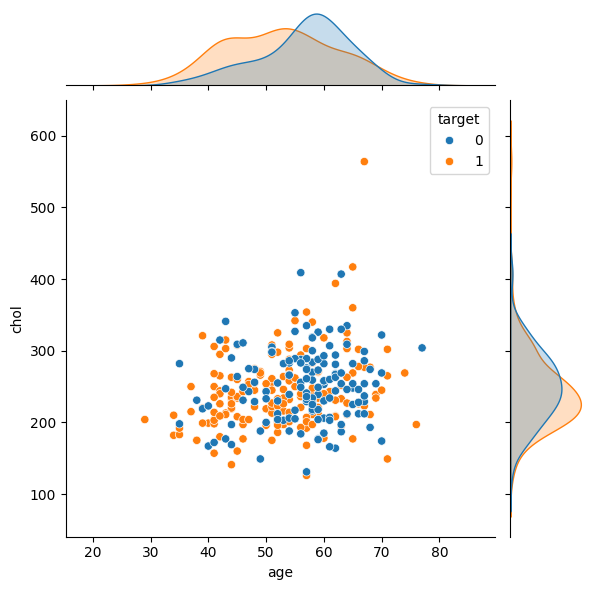

In [77]:
sns.jointplot(x='age', y='chol', hue='target', data=heart_original)

Not very conclusive. Though it seems heart disease is slightly more common at ages 40-60, rather than 55-70. Presumably, because people with heart disease rarely live past 50ish?

---
# Back to machine learning. Let's prep the data.

In [102]:
x = heart.drop('target', axis=1)

In [103]:
x = x.columns

In [104]:
x

Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'sex_male', 'sex_female', 'cp-0', 'cp-1', 'cp-2',
       'cp-3', 'recg-0', 'recg-1', 'recg-2'],
      dtype='object')

In [112]:
x = heart[['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'sex_male', 'sex_female', 'cp-0', 'cp-1', 'cp-2',
       'cp-3', 'recg-0', 'recg-1', 'recg-2']]

In [106]:
y = heart['target']

In [113]:
x

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,sex_male,sex_female,cp-0,cp-1,cp-2,cp-3,recg-0,recg-1,recg-2
0,63,145,233,1,150,0,2.3,0,0,1,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,0,2,0,1,0,0,1,0,0,1,0
2,41,130,204,0,172,0,1.4,2,0,2,1,0,0,1,0,0,1,0,0
3,56,120,236,0,178,0,0.8,2,0,2,0,1,0,1,0,0,0,1,0
4,57,120,354,0,163,1,0.6,2,0,2,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,1,0.2,1,0,3,1,0,1,0,0,0,0,1,0
299,45,110,264,0,132,0,1.2,1,0,3,0,1,0,0,0,1,0,1,0
300,68,144,193,1,141,0,3.4,1,2,3,0,1,1,0,0,0,0,1,0
301,57,130,131,0,115,1,1.2,1,1,3,0,1,1,0,0,0,0,1,0


In [114]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

---
# Logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [145]:
logistic_model = LogisticRegression(max_iter=5000).fit(x_train, y_train)

In [152]:
logistic_model.score(x_test, y_test)

0.79

In [125]:
pred = logistic_model.predict(x_test)

In [126]:
guesses = pd.Series(data=pred, name='Guess')

In [128]:
results = pd.concat([y_test.reset_index(), guesses], axis=1)[['target', 'Guess']]

In [131]:
results

,target,Guess
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
56,1,1
57,0,0
58,0,1
59,0,0


Seems decent, but since this is health data, 70% guess rate is abysmal.

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
cm = confusion_matrix(y_test, pred)

---
# Decision Trees

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)

In [151]:
dtc.score(x_test, y_test)

0.7

Not any better it seems.

---
# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

In [156]:
rfc.score(x_test, y_test)

0.81

Seems better. What if we increase the estimator size?

In [157]:
rfc2 = RandomForestClassifier(n_estimators=10000).fit(x_train, y_train)

In [158]:
rfc2.score(x_test, y_test)

0.82

Measly 0.1 increase. Let's go nuts. 1000000 estimators.

In [159]:
rfc3  = RandomForestClassifier(n_estimators=1000000).fit(x_train, y_train)

Took me 27 minutes. Google servers are SLOW. Let's check the score.

In [160]:
rfc3.score(x_test, y_test)

0.82

Well, that was worth it.

---
# K-Nearest Neighbours

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knc = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

In [163]:
knc.score(x_test, y_test)

0.6

Worst yet. Let's try to find the most optimal number of neighbours.

In [164]:
def find_optimal(nbs):
  score_list = []
  for x in range(nbs):
    knc = KNeighborsClassifier(n_neighbors= x + 1).fit(x_train, y_train)
    score_list.append(knc.score(x_test, y_test))
  return score_list

<Axes: >

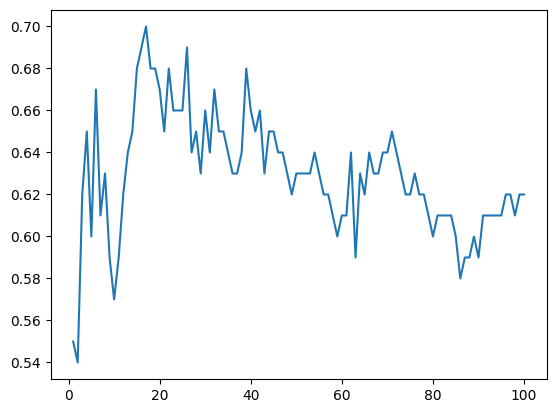

In [166]:
sns.lineplot(x=range(1, 101), y=find_optimal(100))

Seems like ~17 is about the most optimal n-value. Let's try.

In [177]:
knc = KNeighborsClassifier(n_neighbors=17).fit(x_train, y_train)

In [178]:
knc.score(x_test, y_test)

0.7

Even with optimization, its on par with just a simple decision tree. Seems like Random Forest wins!